kaggle - Titanic Problem 

importing pandas and numpy libraries <br>
pandas - data manipulation<br>
numpy for numerical calculations

In [1]:
import pandas as pd

In [2]:
import numpy as np

Loading the datasets

In [4]:
data_train = pd.read_csv('train.csv')

In [5]:
data_test = pd.read_csv('test.csv')

In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking whether the data is Balanced/Imbalanced

In [7]:
import matplotlib.pyplot as plt

In [8]:
data_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

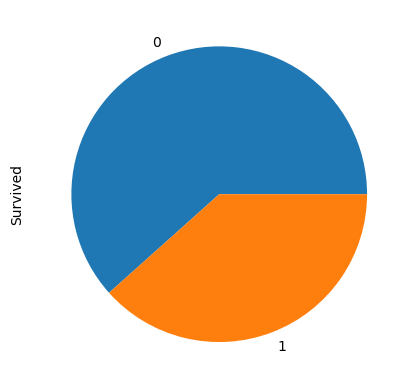

In [9]:
data_train.Survived.value_counts().plot.pie() # pie chart

<AxesSubplot:>

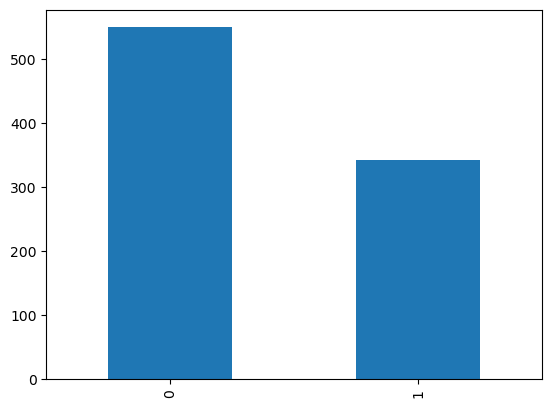

In [10]:
data_train.Survived.value_counts().plot.bar() # barplot - # Imbalanced Dataset

moving the output variable to index 0 position 

In [11]:
data_train = data_train.iloc[:, [1,0,2,3,4,5,6,7,8,9,10,11]]

In [12]:
data_train.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data_train.columns

Index(['Survived', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Categorical Features in Dataset

In [14]:
data_train.Survived.value_counts() # 0- Not Survived, 1 - Survived - Ordinal

0    549
1    342
Name: Survived, dtype: int64

In [15]:
data_train.Pclass.value_counts() # 1 - 1st class, 2 - 2nd class, 3 - 3rd class - Ordinal

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
data_train.Sex.value_counts() # male, female - Nominal data

male      577
female    314
Name: Sex, dtype: int64

In [17]:
data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
des = data_train.describe()

dropping the Irrelavent Features on training dataset

In [19]:
data_train_mod = data_train.drop('Name', axis = 1)

In [20]:
data_train_mod = data_train_mod.drop('Ticket', axis = 1)

In [21]:
data_train_mod = data_train_mod.drop('Cabin', axis = 1)

dropping the Irrelavent Features on test dataset

In [22]:
data_test_mod = data_test.drop('Name', axis = 1)

In [23]:
data_test_mod = data_test_mod.drop('Ticket', axis = 1)

In [24]:
data_test_mod = data_test_mod.drop('Cabin', axis = 1)

EDA - Exploratory Data Analysis - Feature Wise<br>
1 - Survived - Categorical Feature <br>
So Mean, Median is not required<br>
1st moment of business decision

In [25]:
data_train_mod['Survived'].mode()

0    0
Name: Survived, dtype: int64

2 - Pclass - Categorical Feature

In [26]:
data_train_mod['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

In [27]:
data_train_mod['Pclass'].min()

1

In [28]:
data_train_mod['Pclass'].max()

3

In [29]:
data_train_mod['Pclass'].max() - data_train_mod['Pclass'].min()

2

3 - Sex - Categorical Feature

In [30]:
data_train_mod['Sex'].mode()  # need to convert it into Numerical in Data preprocessing step

0    male
Name: Sex, dtype: object

4 - Age - Numerical Feature

In [31]:
data_train_mod['Age'].mean()

29.69911764705882

In [32]:
data_train_mod['Age'].median()

28.0

In [33]:
data_train_mod['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [34]:
data_train_mod['Age'].var()

211.0191247463081

In [35]:
data_train_mod['Age'].std()

14.526497332334044

In [36]:
data_train_mod['Age'].min()

0.42

In [37]:
data_train_mod['Age'].max()

80.0

In [38]:
data_train_mod['Age'].max() - data_train_mod['Age'].min()

79.58

In [39]:
data_train_mod['Age'].skew()

0.38910778230082704

In [40]:
data_train_mod['Age'].kurt()

0.17827415364210353

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

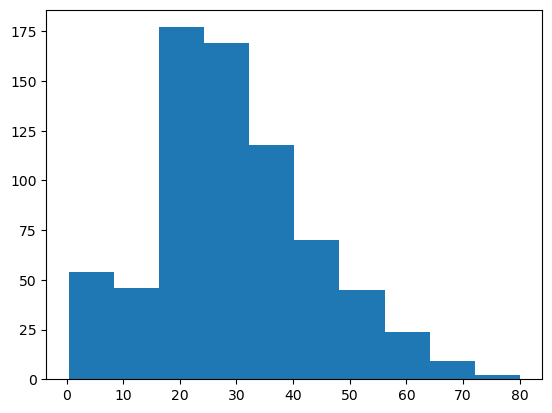

In [41]:
plt.hist(data_train_mod['Age'])

<BarContainer object of 891 artists>

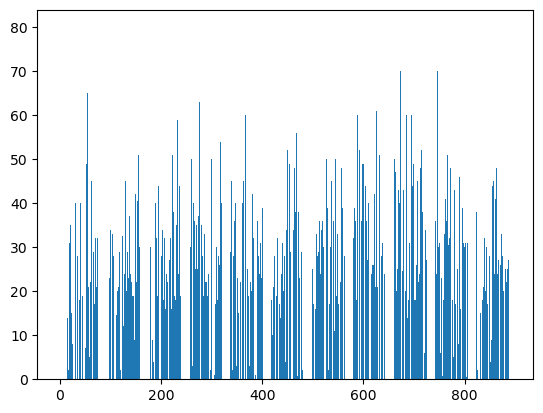

In [42]:
plt.bar(height = data_train_mod['Age'], x = np.arange(1,892,1))

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

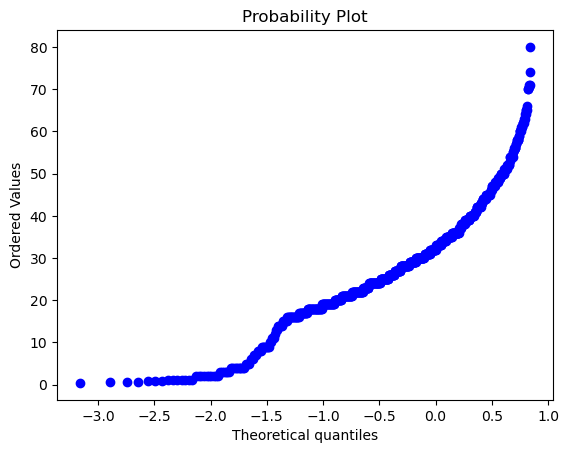

In [43]:
import scipy.stats as stats
import pylab
stats.probplot(data_train_mod['Age'], dist ='norm', plot =pylab)

5 -SibSp - Numerical - Discrete Variable

In [44]:
data_train_mod['SibSp'].mode()

0    0
Name: SibSp, dtype: int64

In [45]:
data_train_mod['SibSp'].min()

0

In [46]:
data_train_mod['SibSp'].max()

8

In [47]:
data_train_mod['SibSp'].max() - data_train_mod['SibSp'].min()

8

<BarContainer object of 891 artists>

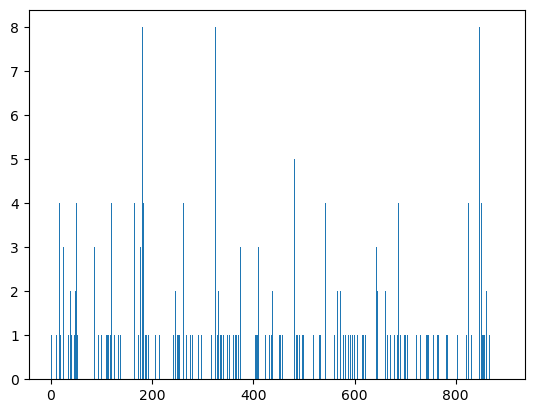

In [48]:
plt.bar(height = data_train_mod['SibSp'], x = np.arange(1,892,1))

6 -SibSp - Numerical - Discrete Variable

In [49]:
data_train_mod['Parch'].mode()

0    0
Name: Parch, dtype: int64

In [50]:
data_train_mod['Parch'].min()

0

In [51]:
data_train_mod['Parch'].max()

6

In [52]:
data_train_mod['Parch'].max() - data_train_mod['Parch'].min()

6

<BarContainer object of 891 artists>

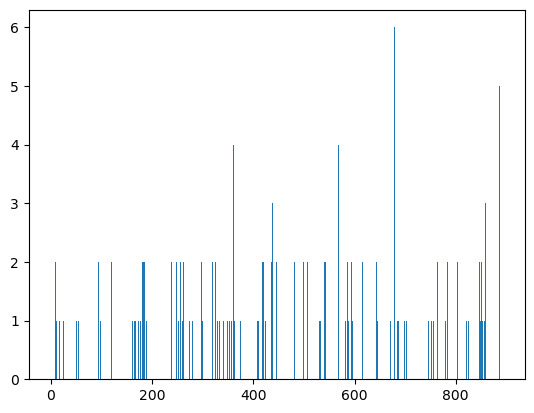

In [53]:
plt.bar(height = data_train_mod['Parch'], x = np.arange(1,892,1))

7 - Fare - Numerical Continuos Variable

In [54]:
data_train_mod['Fare'].mean()

32.2042079685746

In [55]:
data_train_mod['Fare'].median()

14.4542

In [56]:
data_train_mod['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

In [57]:
data_train_mod['Fare'].var()

2469.436845743117

In [58]:
data_train_mod['Fare'].std()

49.693428597180905

In [59]:
data_train_mod['Fare'].min()

0.0

In [60]:
data_train_mod['Fare'].max()

512.3292

In [61]:
data_train_mod['Fare'].max() - data_train_mod['Fare'].min()

512.3292

In [62]:
data_train_mod['Fare'].skew()

4.787316519674893

In [63]:
data_train_mod['Fare'].kurt()

33.39814088089868

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

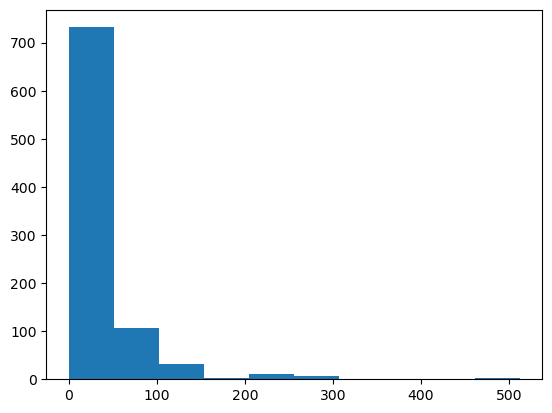

In [64]:
plt.hist(data_train_mod['Fare'])

<BarContainer object of 891 artists>

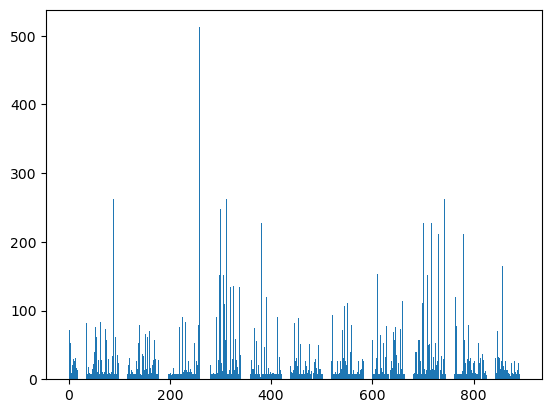

In [65]:
plt.bar(height = data_train_mod['Fare'], x = np.arange(1,892,1))

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

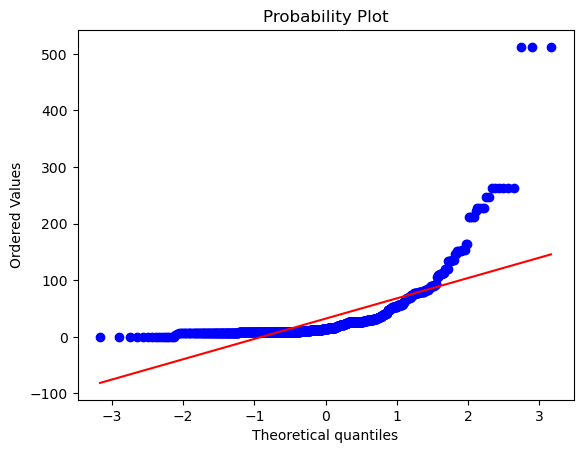

In [66]:
stats.probplot(data_train_mod['Fare'], dist ='norm', plot =pylab)

Data Preprocessing Step<br>
1) Missing values <br>
Two Columns have Missing values

In [67]:
data_train_mod.isna().sum() # Age has 177 missing values & Embarked has 2 missing values

Survived         0
PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Treating missing values in age column

In [68]:
df = data_train_mod[data_train_mod['Age'].isnull()]

In [69]:
df.Survived.value_counts() # 122 not survived and 52 survived in the missing values data w.r.to Age

0    125
1     52
Name: Survived, dtype: int64

In [70]:
df.Pclass.value_counts()  # 136 3rd class and 30 - 1st class and 11 - 2nd class in the missing values w.r.to Age

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [71]:
df.Sex.value_counts() # 124 male and 53 female in missing values w.r.to Age

male      124
female     53
Name: Sex, dtype: int64

In [72]:
df.Embarked.value_counts() # S - 90, Q - 49, C - 38 in missing values data w.rto Age

S    90
Q    49
C    38
Name: Embarked, dtype: int64

the data which is missing is mostly in 3rd class, male, not - survived and from S - Class only<br>
By filling the mean of Age  which are male, 3rdclass,not-survived and From S - Class we can get the approx right data

In [73]:
df1 = data_train_mod[data_train_mod['Pclass'] == 3]

In [74]:
df1 = df1[df1['Survived'] == 0]

In [75]:
df1 = df1[df1['Sex'] == 'male']

In [76]:
df1 = df1[df1['Embarked'] == 'S']

Filling the mean of Age  which are male and 3rdclass and not-survived 

In [77]:
data_train_mod['Age'] = data_train_mod['Age'].fillna(df1['Age'].mean()) # For train dataset

Treating missing values of Embarked Column<br>
Since there are only 2 missing vales we can simply use mode of that column

In [78]:
data_train_mod['Embarked'] = data_train_mod['Embarked'].fillna(data_train_mod['Embarked'].mode()[0]) 

2) Checking for Duplicate values

In [79]:
sum(data_train_mod.duplicated()) # 0 Duplicate rows are present

0

Checking for Outliers

In [80]:
def detect_outliers(df,col):
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR
        outliers = np.where(df[col] > upper_limit, True, np.where(df[col] < lower_limit, True, False))
        return sum(outliers)
        
    
def outlier_treatment(df,col):
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5*IQR
        lower_limit = Q1 - 1.5*IQR
        df[col] = np.where(df[col] > upper_limit, upper_limit, np.where(df[col] < lower_limit, lower_limit, df[col]))
        return df[col]

In [81]:
detect_outliers(data_train_mod, 'Age') # 66 outliers are present

66

In [82]:
outlier_treatment(data_train_mod, 'Age')

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.168478
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [83]:
detect_outliers(data_train_mod, 'Fare') # 116 outliers are present

116

In [84]:
outlier_treatment(data_train_mod, 'Fare')

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [85]:
des = data_train_mod.describe() # Checking the descriptive Analysis after Treating Outliers

3) Converting Non - Numerical Features to Numerical<br>
The Non - Numerical Features are :

In [86]:
                                    # 1) Sex - Nominal
                                    # 2) Embarked - Nominal
# Converting Sex column Using oneHot encoding
data_train_mod = pd.get_dummies(data_train_mod, columns = ['Sex'])

Embarked Column

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

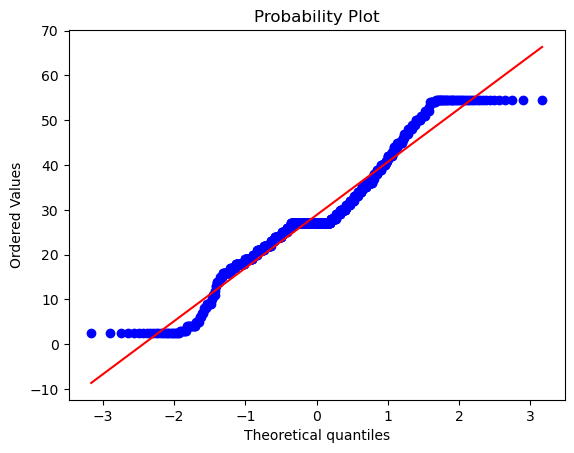

In [87]:
data_train_mod = pd.get_dummies(data_train_mod, columns = ['Embarked'])
  
# 4) Checking whether the data is normally distributed or not for Continuos Variables
stats.probplot(data_train_mod['Age'], dist ='norm', plot =pylab) # data is mostly Normally distributed

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

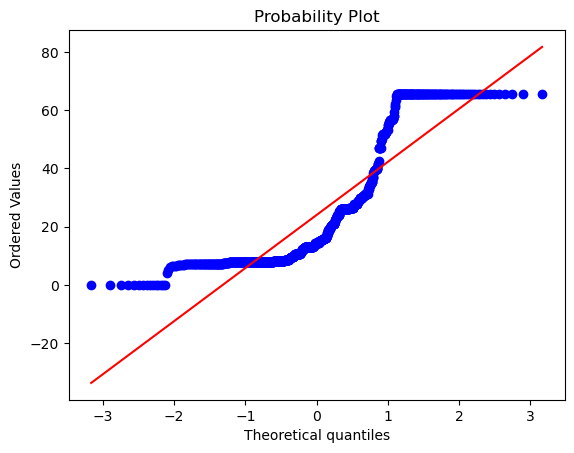

In [88]:
stats.probplot(data_train_mod['Fare'], dist ='norm', plot =pylab)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

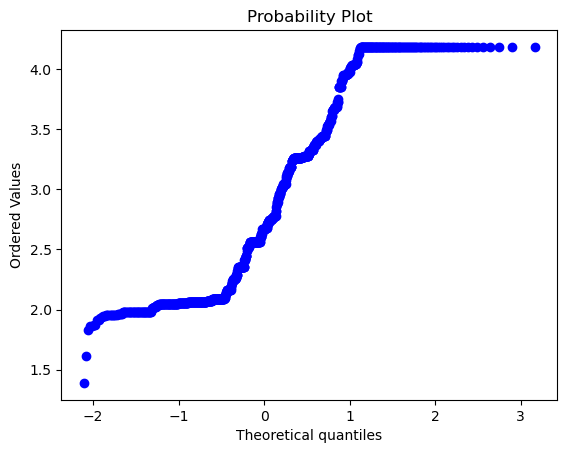

In [89]:
stats.probplot(np.log(data_train_mod['Fare']), dist ='norm', plot =pylab)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

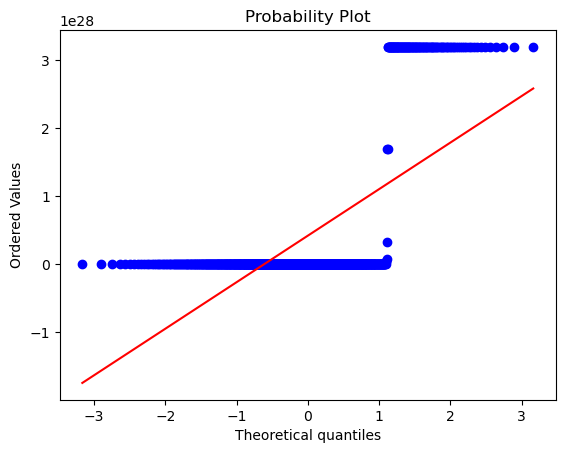

In [90]:
stats.probplot(np.exp(data_train_mod['Fare']), dist ='norm', plot =pylab)

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

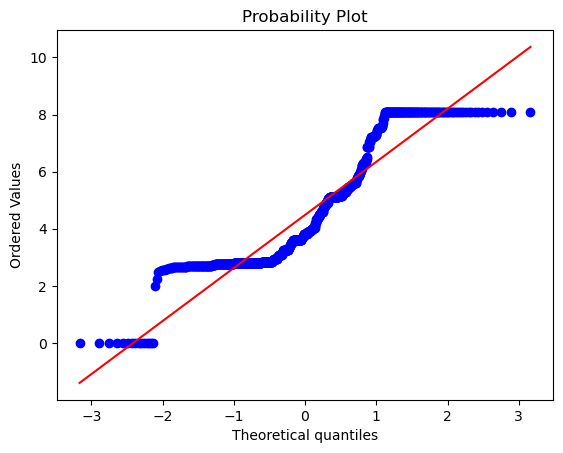

In [91]:
stats.probplot(np.sqrt(data_train_mod['Fare']), dist ='norm', plot =pylab)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

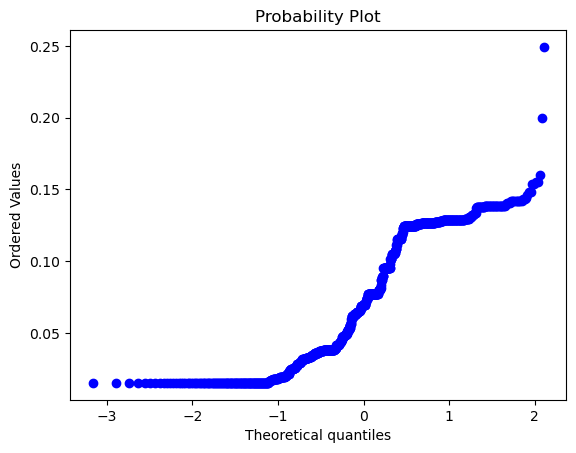

In [92]:
stats.probplot(np.reciprocal(data_train_mod['Fare']), dist ='norm', plot =pylab)

In [93]:
Fare_tr = data_train_mod['Fare'].transform([np.log, np.exp, np.sqrt, np.reciprocal])

(array([772.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0., 116.]),
 array([1.00000000e+00, 3.19637513e+27, 6.39275026e+27, 9.58912539e+27,
        1.27855005e+28, 1.59818757e+28, 1.91782508e+28, 2.23746259e+28,
        2.55710010e+28, 2.87673762e+28, 3.19637513e+28]),
 <BarContainer object of 10 artists>)

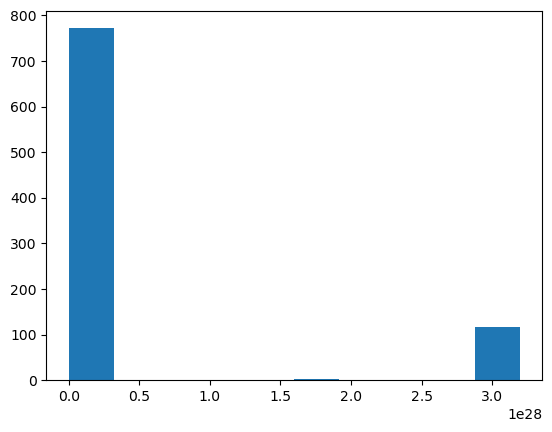

In [94]:
plt.hist(Fare_tr['exp'])

(array([ 15.,   0.,   2., 346., 131.,  53., 133.,  39.,  31., 141.]),
 array([0.        , 0.8101506 , 1.62030121, 2.43045181, 3.24060241,
        4.05075302, 4.86090362, 5.67105422, 6.48120483, 7.29135543,
        8.10150603]),
 <BarContainer object of 10 artists>)

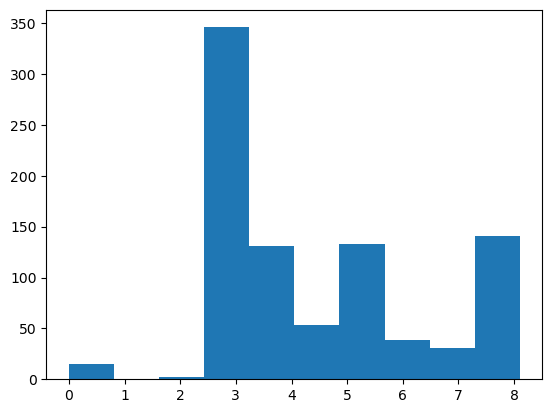

In [95]:
plt.hist(Fare_tr['sqrt']) # Sqrt transformation seems like appropriate to normal distribution

In [96]:
data_train_mod['Fare'] = data_train_mod['Fare'].transform(np.sqrt)

Scaling the data<br>
Using Customized Min-Max Scalor Function

In [97]:
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return x;

In [98]:
data_train_mod['Age'] = norm_func(data_train_mod['Age'])

In [99]:
data_train_mod['Fare'] = norm_func(data_train_mod['Fare'])

In [100]:
des = data_train_mod.describe()

Making the dataset Imbalanced to Balanced

In [101]:
X = data_train_mod.iloc[:, 2:]

In [102]:
y = data_train_mod.iloc[:,:2]

Pie Plot before applyting Random UnderSampling

<AxesSubplot:ylabel='Survived'>

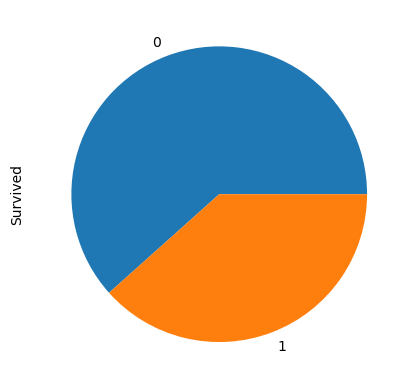

In [103]:
y['Survived'].value_counts().plot.pie()

conda install -c conda-forge imbalanced-learn

In [107]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(sampling_strategy = 'not minority')

In [108]:
X_res, y_res = rus.fit_resample(X, y['Survived'])

In [109]:
y_res = pd.DataFrame(y_res)

<AxesSubplot:ylabel='None'>

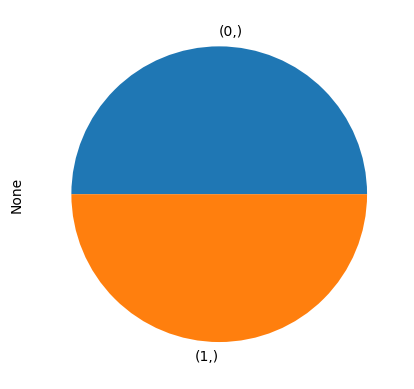

In [110]:
y_res.value_counts().plot.pie()

Data Preprocessing on Test Data set

In [111]:
data_test_mod.isna().sum() # Age column has  86 missing values on test dataset & 1 Missing value in test dataset

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

Treating missing values in age column

In [112]:
df = data_test_mod[data_test_mod['Age'].isnull()]

In [113]:
df.Pclass.value_counts()  # 72  3rd class and 9 - 1st class and 5 - 2nd class in the missing values w.r.to Age

3    72
1     9
2     5
Name: Pclass, dtype: int64

In [114]:
df.Sex.value_counts() # 61 male and 25 female in missing values w.r.to Age

male      61
female    25
Name: Sex, dtype: int64

In [115]:
df.Embarked.value_counts() # S - 42, Q - 24, C - 20 in missing values data w.rto Age

S    42
Q    24
C    20
Name: Embarked, dtype: int64

the data which is missing is mostly in 3rd class, male,from S - Class only<br>
By filling the mean of Age  which are male, 3rdclass, From S - Class we can get the approx right data

In [116]:
df1 = data_test_mod[data_test_mod['Pclass'] == 3]

In [117]:
df1 = df1[df1['Sex'] == 'male']

In [118]:
df1 = df1[df1['Embarked'] == 'S']

Filling the mean of Age  which are male and 3rdclass and not-survived 

In [119]:
data_test_mod['Age'] = data_test_mod['Age'].fillna(df1['Age'].mean()) # For train dataset

Treating missing values of Fare Column<br>
Since there are only 1 missing vales we can simply use mode of that column

In [120]:
data_test_mod['Fare'] = data_test_mod['Fare'].fillna(data_test_mod['Fare'].mean()) 

2) Checking for Duplicate values

In [121]:
sum(data_test_mod.duplicated()) # 0 Duplicate rows are present

0

Checking for Outliers

In [122]:
detect_outliers(data_test_mod, 'Age') # 36  outliers are present

36

In [123]:
outlier_treatment(data_test_mod, 'Age')

0      34.500000
1      47.000000
2      54.875000
3      27.000000
4      22.000000
         ...    
413    24.939605
414    39.000000
415    38.500000
416    24.939605
417    24.939605
Name: Age, Length: 418, dtype: float64

In [124]:
detect_outliers(data_test_mod, 'Fare') # 55 outliers are present

55

In [125]:
outlier_treatment(data_test_mod, 'Fare')

0       7.8292
1       7.0000
2       9.6875
3       8.6625
4      12.2875
        ...   
413     8.0500
414    66.9063
415     7.2500
416     8.0500
417    22.3583
Name: Fare, Length: 418, dtype: float64

In [126]:
des_test = data_test_mod.describe()

3) Converting Non - Numerical Features to Numerical<br>
The Non - Numerical Features are :

In [127]:
                                    # 1) Sex - Nominal
                                    # 2) Embarked - Nominal
# Converting Sex column Using oneHot encoding
data_test_mod = pd.get_dummies(data_test_mod, columns = ['Sex'])

Embarked Column

((array([-2.93702766, -2.6502503 , -2.48862734, -2.37383857, -2.28377496,
         -2.20913468, -2.14508828, -2.08879364, -2.03843131, -1.99276366,
         -1.95090921, -1.91221703, -1.87619232, -1.84244974, -1.81068319,
         -1.78064526, -1.75213303, -1.72497793, -1.69903832, -1.674194  ,
         -1.65034206, -1.6273937 , -1.60527171, -1.58390852, -1.56324469,
         -1.54322758, -1.5238104 , -1.50495131, -1.48661278, -1.468761  ,
         -1.4513654 , -1.43439822, -1.41783423, -1.40165035, -1.38582549,
         -1.37034025, -1.35517682, -1.34031874, -1.32575079, -1.3114589 ,
         -1.29742997, -1.28365184, -1.27011319, -1.25680341, -1.24371263,
         -1.23083159, -1.21815159, -1.20566447, -1.19336258, -1.18123868,
         -1.16928597, -1.15749802, -1.14586875, -1.13439242, -1.12306358,
         -1.11187708, -1.10082801, -1.08991172, -1.07912379, -1.06846   ,
         -1.05791635, -1.04748902, -1.03717435, -1.02696887, -1.01686924,
         -1.00687229, -0.99697496, -0.

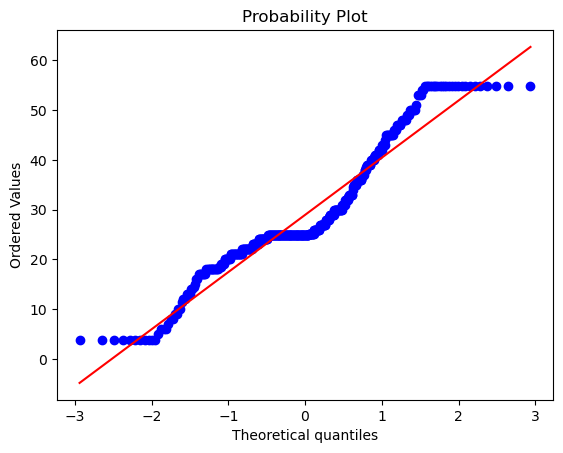

In [128]:
data_test_mod = pd.get_dummies(data_test_mod, columns = ['Embarked'])
  
# 4) Checking whether the data is normally distributed or not for Continuos Variables
stats.probplot(data_test_mod['Age'], dist ='norm', plot =pylab) # data is mostly Normally distributed

((array([-2.93702766, -2.6502503 , -2.48862734, -2.37383857, -2.28377496,
         -2.20913468, -2.14508828, -2.08879364, -2.03843131, -1.99276366,
         -1.95090921, -1.91221703, -1.87619232, -1.84244974, -1.81068319,
         -1.78064526, -1.75213303, -1.72497793, -1.69903832, -1.674194  ,
         -1.65034206, -1.6273937 , -1.60527171, -1.58390852, -1.56324469,
         -1.54322758, -1.5238104 , -1.50495131, -1.48661278, -1.468761  ,
         -1.4513654 , -1.43439822, -1.41783423, -1.40165035, -1.38582549,
         -1.37034025, -1.35517682, -1.34031874, -1.32575079, -1.3114589 ,
         -1.29742997, -1.28365184, -1.27011319, -1.25680341, -1.24371263,
         -1.23083159, -1.21815159, -1.20566447, -1.19336258, -1.18123868,
         -1.16928597, -1.15749802, -1.14586875, -1.13439242, -1.12306358,
         -1.11187708, -1.10082801, -1.08991172, -1.07912379, -1.06846   ,
         -1.05791635, -1.04748902, -1.03717435, -1.02696887, -1.01686924,
         -1.00687229, -0.99697496, -0.

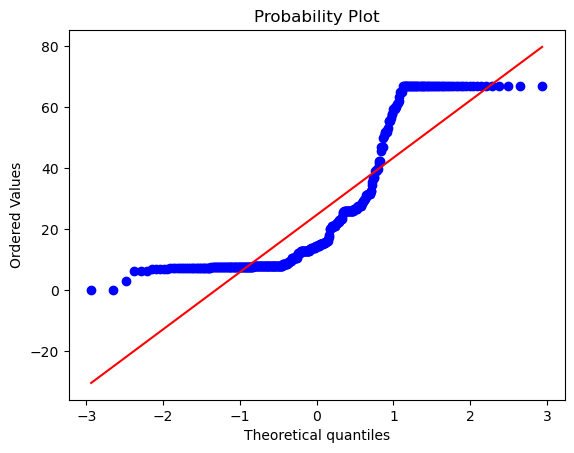

In [129]:
stats.probplot(data_test_mod['Fare'], dist ='norm', plot =pylab)

In [130]:
Fare_test_tr = data_test_mod['Fare'].transform([np.log, np.exp, np.sqrt, np.reciprocal])

(array([360.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55.]),
 array([1.00000000e+00, 1.14034666e+28, 2.28069332e+28, 3.42103998e+28,
        4.56138664e+28, 5.70173330e+28, 6.84207996e+28, 7.98242661e+28,
        9.12277327e+28, 1.02631199e+29, 1.14034666e+29]),
 <BarContainer object of 10 artists>)

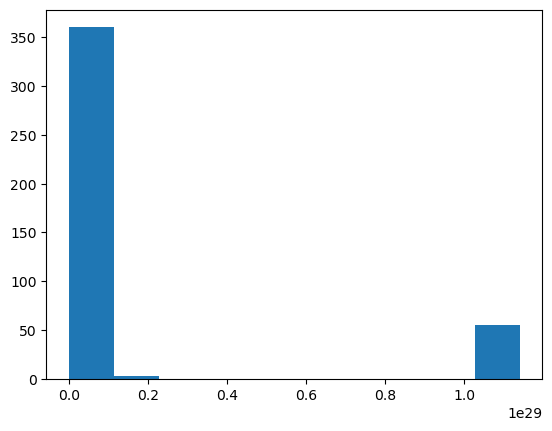

In [131]:
plt.hist(Fare_test_tr['exp'])

(array([  2.,   0.,   1., 163.,  69.,  28.,  56.,  14.,  12.,  73.]),
 array([0.        , 0.81796271, 1.63592543, 2.45388814, 3.27185085,
        4.08981357, 4.90777628, 5.72573899, 6.5437017 , 7.36166442,
        8.17962713]),
 <BarContainer object of 10 artists>)

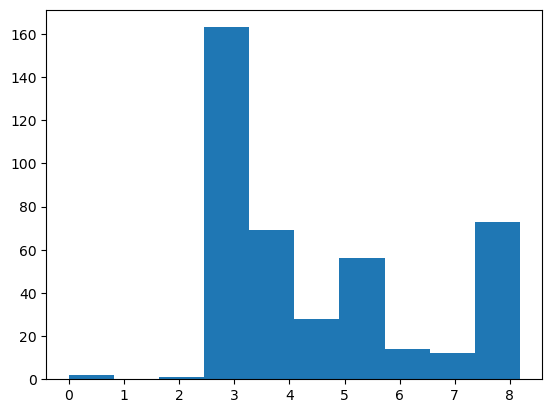

In [132]:
plt.hist(Fare_test_tr['sqrt']) # Sqrt transformation seems like appropriate to normal distribution

In [133]:
data_test_mod['Fare'] = data_test_mod['Fare'].transform(np.sqrt)

Scaling the data<br>
Using Customized Min-Max Scalor Function

In [134]:
data_test_mod['Age'] = norm_func(data_test_mod['Age'])

In [135]:
data_test_mod['Fare'] = norm_func(data_test_mod['Fare'])

In [136]:
des_test = data_test_mod.describe()

Applying Decision Tree Algorithm<br>
Splitting the Input data

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.1)

In [138]:
sum(y_train['Survived'])/len(y_train['Survived']) # 49.7 %

0.4959349593495935

In [139]:
sum(y_test['Survived'])/len(y_test['Survived']) # 52.1% - # Data is splitted Balanced only

0.5362318840579711

In [140]:
from sklearn.tree import DecisionTreeClassifier as DT

By the GridSearchCV I have chosen the Best Parameters and Building a model Based on that

In [141]:
final_model = DT(max_depth =  10, min_samples_leaf = 10, max_features = 'log2')

Training the model

In [142]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=10)

Prediction on splitted Test data of Train Dataset

In [143]:
pred = final_model.predict(X_test)

Cross tab or Confusion matrix

In [144]:
pd.crosstab(y_test['Survived'], pred, rownames=['Actual_values'], colnames=['Predicted_values'])

Predicted_values,0,1
Actual_values,,
0,23,9
1,10,27


Accuracy

In [145]:
np.mean(pred == y_test['Survived']) # 76.8.5%

0.7246376811594203

For validation purpose predicting on train data of Train Dataset

In [146]:
pred_train = final_model.predict(X_train)

Cross tab or Confusion matrix

In [147]:
pd.crosstab(y_train['Survived'], pred_train, rownames=['Actual_values'], colnames=['Predicted_values'])

Predicted_values,0,1
Actual_values,,
0,259,51
1,71,234


Accuracy on Train Data

In [148]:
np.mean(pred_train == y_train['Survived']) # 82.6 % - # Model seems fine 

0.8016260162601626

predicting on test dataset

In [149]:
pred_final = final_model.predict(data_test_mod.iloc[:,1:])
print('The Predicted values on Test Dataset is :',pred_final)

The Predicted values on Test Dataset is : [0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 1]


In [150]:
final_submission = pd.DataFrame(data_test_mod['PassengerId'])

In [151]:
final_submission['Survived'] = pred_final

In [152]:
final_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
